# Problem for Covid - 19 Data Analysis Project using Python

### Importing the dataset

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'
df = pd.read_csv(url)

### High Level Data Understanding

In [2]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 57394
Number of columns: 49


In [3]:
print(df.dtypes)


iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [4]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

### Low Level Data Understanding

In [5]:
unique_locations = df['location'].nunique()
print(f"Number of unique locations: {unique_locations}")


Number of unique locations: 216


In [6]:
continent_counts = df['continent'].value_counts()
max_continent = continent_counts.idxmax()
print(f"Continent with maximum frequency: {max_continent}")


Continent with maximum frequency: Europe


In [7]:
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print(f"Maximum total cases: {max_total_cases}")
print(f"Mean total cases: {mean_total_cases}")


Maximum total cases: 55154651.0
Mean total cases: 167797.3688753302


In [8]:
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print(quartiles_total_deaths)


0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [9]:
max_hdi_continent = df.groupby('continent')['human_development_index'].max().idxmax()
print(f"Continent with maximum human development index: {max_hdi_continent}")


Continent with maximum human development index: Europe


In [10]:
min_gdp_continent = df.groupby('continent')['gdp_per_capita'].min().idxmin()
print(f"Continent with minimum GDP per capita: {min_gdp_continent}")


Continent with minimum GDP per capita: Africa


### Filter the dataframe

In [11]:
columns_to_keep = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df1 = df[columns_to_keep]
df1.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


### Data Cleaning

In [12]:
df = df.drop_duplicates()


In [13]:
missing_values = df.isnull().sum()
print(missing_values)


iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

In [14]:
df = df.dropna(subset=['continent'])


In [15]:
df = df.fillna(0)


### Date time format

In [16]:
df['date'] = pd.to_datetime(df['date'])


/var/folders/md/_259zqt935v9vhqjltc02qs80000gn/T/ipykernel_83544/584440916.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [17]:
df['month'] = df['date'].dt.month


### Date time format

In [18]:
df['date'] = pd.to_datetime(df['date'])


In [19]:
df['month'] = df['date'].dt.month

### Data Aggregation

In [20]:
df_groupby = df.groupby('continent').max().reset_index()


### Feature Engineering

In [21]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']


### Data Visualization

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

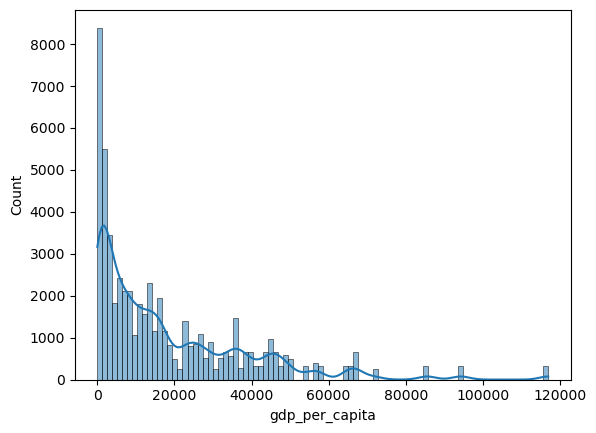

In [23]:
sns.histplot(df['gdp_per_capita'].dropna(), kde=True)
plt.show()


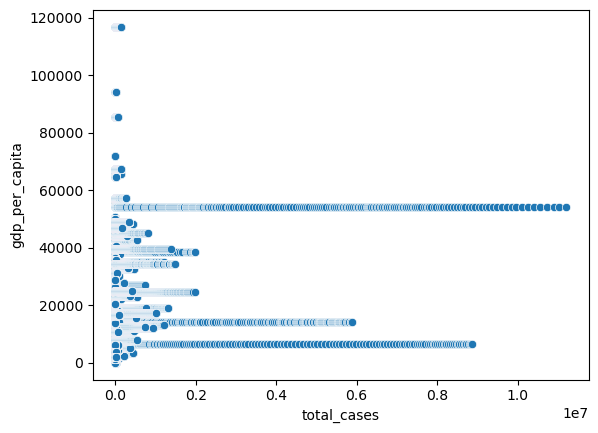

In [24]:
sns.scatterplot(data=df, x='total_cases', y='gdp_per_capita')
plt.show()


In [ ]:
sns.pairplot(df_groupby)
plt.show()

In [ ]:
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')
plt.show()


### Saving the df_groupby dataframe in my local drive

In [ ]:
df_groupby.to_csv('df_groupby.csv', index=False)
